# 1. Kết nối tới drive , import một số thư viện cần thiết

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import column_or_1d

from keras.models import Sequential
from keras.layers import Dense, GRU

In [3]:
CMG = pd.read_csv("/content/drive/MyDrive/DAB Final Project/Source Code/Dataset/CMG.csv")

In [4]:
CMG

,Date,Price,Open,High,Low,Vol.,Change %
0,12/1/2017,19753,19621,19951,19026,432.09K,1.01%
1,12/4/2017,20612,20348,20744,20149,476.28K,4.35%
2,12/5/2017,21008,20612,21801,20017,923.95K,1.92%
3,12/6/2017,22065,21008,22462,20876,747.13K,5.03%
4,12/7/2017,23585,22462,23585,22462,808.92K,6.89%
...,...,...,...,...,...,...,...
1371,6/5/2023,44050,41200,44050,41200,207.10K,6.92%
1372,6/6/2023,45700,46500,46500,43950,50.20K,3.75%
1373,6/7/2023,45500,44200,46000,43600,24.40K,-0.44%
1374,6/8/2023,44500,44100,44900,43600,25.00K,-2.20%


In [5]:
CMG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376 entries, 0 to 1375
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1376 non-null   object
 1   Price     1376 non-null   int64 
 2   Open      1376 non-null   int64 
 3   High      1376 non-null   int64 
 4   Low       1376 non-null   int64 
 5   Vol.      1376 non-null   object
 6   Change %  1376 non-null   object
dtypes: int64(4), object(3)
memory usage: 75.4+ KB


# 2. Tiền xử lý dữ liệu

### Loại bỏ một số dữ liệu trống trong dataset

In [6]:
# Drop missing values
CMG = CMG.dropna()

In [7]:
CMG1 = CMG.reset_index()['Price']

In [8]:
CMG['Index'] = np.arange(len(CMG.index))

<h1> 3.Scale dữ liệu

In [9]:
scaler=MinMaxScaler(feature_range=(0,1))
CMG1=scaler.fit_transform(np.array(CMG1).reshape(-1,1))

# 4. Chia tập dữ liệu để train-test-validate theo tỉ lệ 7:2:1

In [10]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(CMG1))
test_size = int(0.2 * len(CMG1))
val_size = len(CMG1) - train_size - test_size

In [11]:
train_data = CMG1[:train_size]
test_data = CMG1[train_size:train_size+test_size]
val_data = CMG1[train_size+test_size:]

<h1>Hàm Create Dataset

In [12]:
#Chuyển mảng giá trị của dataset thành ma trận
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [13]:
import numpy
#Reshape into X=t,t+1, t+2... t+99 and Y= t+100
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [15]:
#Define GRU model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
#Model fitting
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 4s 103ms/step - loss: 0.0314 - val_loss: 0.0279
Epoch 2/100
14/14 [==============================] - 1s 63ms/step - loss: 0.0087 - val_loss: 0.0528
Epoch 3/100
14/14 [==============================] - 1s 96ms/step - loss: 0.0040 - val_loss: 0.0249
Epoch 4/100
14/14 [==============================] - 2s 110ms/step - loss: 0.0017 - val_loss: 0.0050
Epoch 5/100
14/14 [==============================] - 2s 113ms/step - loss: 6.8222e-04 - val_loss: 0.0018
Epoch 6/100
14/14 [==============================] - 1s 78ms/step - loss: 3.8642e-04 - val_loss: 0.0029
Epoch 7/100
14/14 [==============================] - 1s 66ms/step - loss: 3.7469e-04 - val_loss: 0.0028
Epoch 8/100
14/14 [==============================] - 1s 64ms/step - loss: 3.5777e-04 - val_loss: 0.0021
Epoch 9/100
14/14 [==============================] - 1s 64ms/step - loss: 3.5128e-04 - val_loss: 0.0021
Epoch 10/100
14/14 [==============================] - 1s 65ms/step - loss: 3.

<h1>Dự báo dữ liệu test, val

In [17]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 14ms/step


<h1>Chuẩn hóa dữ liệu

In [18]:
#Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [19]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
ytest

array([[49273.],
       [49097.],
       [48832.],
       [49008.],
       [49008.],
       [52364.],
       [52540.],
       [52099.],
       [48743.],
       [49626.],
       [49891.],
       [49626.],
       [49273.],
       [52717.],
       [53953.],
       [55631.],
       [56073.],
       [55454.],
       [55896.],
       [57397.],
       [57839.],
       [56249.],
       [56514.],
       [57309.],
       [58192.],
       [60841.],
       [62430.],
       [58104.],
       [61812.],
       [60929.],
       [58898.],
       [54836.],
       [55808.],
       [56249.],
       [56779.],
       [57220.],
       [56249.],
       [57132.],
       [55808.],
       [55190.],
       [54218.],
       [55013.],
       [52099.],
       [50245.],
       [47684.],
       [50333.],
       [52099.],
       [49715.],
       [51657.],
       [50774.],
       [49273.],
       [52099.],
       [52099.],
       [53688.],
       [53688.],
       [53159.],
       [51481.],
       [52011.],
       [53865.

In [20]:
yval = scaler.inverse_transform(yval.reshape(-1,1))
yval

array([[41850.],
       [41850.],
       [41800.],
       [41800.],
       [41650.],
       [41650.],
       [41500.],
       [41300.],
       [41400.],
       [41500.],
       [41600.],
       [41550.],
       [41500.],
       [41500.],
       [41450.],
       [41450.],
       [41450.],
       [41400.],
       [41400.],
       [41250.],
       [41000.],
       [41000.],
       [40900.],
       [40800.],
       [40500.],
       [40750.],
       [40700.],
       [40500.],
       [41150.],
       [41000.],
       [40850.],
       [41000.],
       [41200.],
       [44050.],
       [45700.],
       [45500.],
       [44500.]])

<h1>Đánh giá độ chính xác của thuật toán

In [21]:
# RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 711.5558433016777
Testing RMSE: 1709.6574549966933


In [22]:
#MAE
valid_mae = mean_absolute_error(yval,y_pred_val)
test_mae = mean_absolute_error(ytest, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 503.0782305743243
Testing MAE: 1279.1798221982758


In [23]:
#MAPE
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval))*100
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 1.1873399346824796
Testing MAPE: 2.601754754305851


<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [24]:
x_input=val_data[37:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.56905504 0.56206566 0.55707325 0.55807173 0.56206566 0.57205048
 0.58403227 0.6219746  0.61198978 0.61398674 0.58403227 0.60000799
 0.61198978 0.60200495 0.57804138 0.59102165 0.59102165 0.58203531
 0.59002316 0.59002316 0.58403227 0.57804138 0.57704289 0.59002316
 0.59002316 0.55208084 0.57005352 0.56306414 0.55008387 0.56406262
 0.57005352 0.56106718 0.53810208 0.56106718 0.55907021 0.56605959
 0.56206566 0.57205048 0.56805655 0.54009905 0.57804138 0.57205048
 0.57404745 0.55807173 0.571052   0.55607477 0.56206566 0.56306414
 0.56106718 0.5600687  0.55208084 0.55108235 0.55008387 0.56406262
 0.56306414 0.59002316 0.58103682 0.58403227 0.58403227 0.58702772
 0.58203531 0.58902468 0.58902468 0.58902468 0.5880262  0.5880262
 0.58503075 0.58503075 0.58203531 0.57804138 0.58003834 0.58203531
 0.58403227 0.58303379 0.58203531 0.58203531 0.58103682 0.58103682
 0.58103682 0.58003834 0.58003834 0.57704289 0.57205048 0.57205048
 0.57005352 0.56805655 0.56206566 0.56705807 0.5660

In [25]:
print(scaler.inverse_transform(lst_output))

[[45758.27648449]
 [46131.38071275]
 [46501.30616927]
 [46875.93561101]
 [47254.21840167]
 [47636.6321032 ]
 [48023.30207562]
 [48414.35069418]
 [48809.87347126]
 [49209.96890402]
 [49614.71758103]
 [50024.17621279]
 [50438.39255548]
 [50857.42630434]
 [51281.30432224]
 [51710.06839585]
 [52143.7244947 ]
 [52582.30843592]
 [53025.81126523]
 [53474.24492168]
 [53927.58851194]
 [54385.83009696]
 [54848.93684435]
 [55316.89681506]
 [55789.65926814]
 [56267.17644739]
 [56749.37671852]
 [57236.19441676]
 [57727.55790782]
 [58223.37167931]]


<h1>Vẽ hình mô tả dự đoán

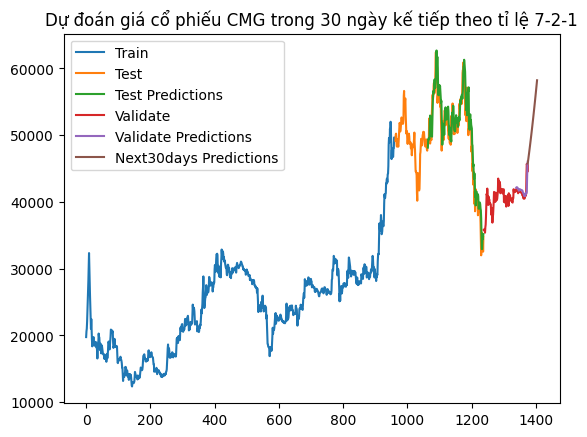

In [26]:
#Drawing plot
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(CMG1)-1, stop=len(CMG1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Test Predictions ','Validate','Validate Predictions','Next30days Predictions'])
plt.title("Dự đoán giá cổ phiếu CMG trong 30 ngày kế tiếp theo tỉ lệ 7-2-1")
plt.show()

# 5. Chia tập dữ liệu để train-test-validate theo tỉ lệ 6:3:1

In [27]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(CMG1))
test_size = int(0.3 * len(CMG1))
val_size = len(CMG1) - train_size - test_size

In [28]:
train_data = CMG1[:train_size]
test_data = CMG1[train_size:train_size+test_size]
val_data = CMG1[train_size+test_size:]

<h1>Hàm Create Dataset

In [29]:
#Chuyển mảng giá trị của dataset thành ma trận
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [30]:
import numpy
#Reshape into X=t,t+1, t+2... t+99 and Y= t+100
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [31]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [32]:
#Define GRU model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
#Model fitting
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 4s 113ms/step - loss: 0.0201 - val_loss: 0.0322
Epoch 2/100
12/12 [==============================] - 1s 71ms/step - loss: 0.0067 - val_loss: 0.0822
Epoch 3/100
12/12 [==============================] - 1s 73ms/step - loss: 0.0038 - val_loss: 0.0542
Epoch 4/100
12/12 [==============================] - 1s 74ms/step - loss: 0.0019 - val_loss: 0.0162
Epoch 5/100
12/12 [==============================] - 1s 70ms/step - loss: 0.0010 - val_loss: 0.0131
Epoch 6/100
12/12 [==============================] - 1s 71ms/step - loss: 5.4549e-04 - val_loss: 0.0024
Epoch 7/100
12/12 [==============================] - 1s 70ms/step - loss: 3.3050e-04 - val_loss: 0.0017
Epoch 8/100
12/12 [==============================] - 1s 73ms/step - loss: 2.8690e-04 - val_loss: 0.0016
Epoch 9/100
12/12 [==============================] - 1s 103ms/step - loss: 2.8263e-04 - val_loss: 0.0014
Epoch 10/100
12/12 [==============================] - 1s 117ms/step - loss: 2.7971

<h1>Dự báo dữ liệu test, val

In [34]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 12ms/step


<h1>Chuẩn hóa dữ liệu

In [35]:
#Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [36]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
ytest

array([[36374.],
       [36374.],
       [37185.],
       [39777.],
       [41154.],
       [40668.],
       [40587.],
       [41154.],
       [41316.],
       [42774.],
       [42693.],
       [43422.],
       [43503.],
       [42936.],
       [44152.],
       [44233.],
       [45367.],
       [48526.],
       [49579.],
       [48931.],
       [48931.],
       [50957.],
       [50065.],
       [52010.],
       [50633.],
       [49012.],
       [46420.],
       [47797.],
       [47716.],
       [47635.],
       [46825.],
       [46744.],
       [48121.],
       [48121.],
       [49660.],
       [49660.],
       [49417.],
       [49336.],
       [49174.],
       [50065.],
       [50228.],
       [49417.],
       [48364.],
       [48283.],
       [49417.],
       [49336.],
       [48607.],
       [48283.],
       [49012.],
       [50065.],
       [51038.],
       [51848.],
       [51686.],
       [50552.],
       [50957.],
       [51443.],
       [52091.],
       [52658.],
       [52496.

In [37]:
yval = scaler.inverse_transform(yval.reshape(-1,1))
yval

array([[41850.],
       [41850.],
       [41850.],
       [41800.],
       [41800.],
       [41650.],
       [41650.],
       [41500.],
       [41300.],
       [41400.],
       [41500.],
       [41600.],
       [41550.],
       [41500.],
       [41500.],
       [41450.],
       [41450.],
       [41450.],
       [41400.],
       [41400.],
       [41250.],
       [41000.],
       [41000.],
       [40900.],
       [40800.],
       [40500.],
       [40750.],
       [40700.],
       [40500.],
       [41150.],
       [41000.],
       [40850.],
       [41000.],
       [41200.],
       [44050.],
       [45700.],
       [45500.],
       [44500.]])

<h1>Đánh giá độ chính xác của thuật toán

In [38]:
# RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 778.7477132970082
Testing RMSE: 1544.7219377734061


In [39]:
#MAE
valid_mae = mean_absolute_error(yval,y_pred_val)
test_mae = mean_absolute_error(ytest, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 479.06825657894734
Testing MAE: 1186.3064647809488


In [40]:
#MAPE
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval))*100
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 1.1232363819156714
Testing MAPE: 2.40230301528218


<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [41]:
x_input=val_data[39:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.6518837]
101
1 day input [0.56206566 0.55707325 0.55807173 0.56206566 0.57205048 0.58403227
 0.6219746  0.61198978 0.61398674 0.58403227 0.60000799 0.61198978
 0.60200495 0.57804138 0.59102165 0.59102165 0.58203531 0.59002316
 0.59002316 0.58403227 0.57804138 0.57704289 0.59002316 0.59002316
 0.55208084 0.57005352 0.56306414 0.55008387 0.56406262 0.57005352
 0.56106718 0.53810208 0.56106718 0.55907021 0.56605959 0.56206566
 0.57205048 0.56805655 0.54009905 0.57804138 0.57205048 0.57404745
 0.55807173 0.571052   0.55607477 0.56206566 0.56306414 0.56106718
 0.5600687  0.55208084 0.55108235 0.55008387 0.56406262 0.56306414
 0.59002316 0.58103682 0.58403227 0.58403227 0.58702772 0.58203531
 0.58902468 0.58902468 0.58902468 0.5880262  0.5880262  0.58503075
 0.58503075 0.58203531 0.57804138 0.58003834 0.58203531 0.58403227
 0.58303379 0.58203531 0.58203531 0.58103682 0.58103682 0.58103682
 0.58003834 0.58003834 0.57704289 0.57205048 0.57205048 0.57005352
 0.56805655 0.56206566 0.56705807 

In [42]:
print(scaler.inverse_transform(lst_output))

[[44997.7292304 ]
 [44780.32213712]
 [44513.74108672]
 [44229.17982888]
 [43930.31857538]
 [43620.1749208 ]
 [43301.1665225 ]
 [42975.32898831]
 [42644.5039165 ]
 [42310.28815484]
 [41974.1442368 ]
 [41637.34964061]
 [41301.0534997 ]
 [40966.28854179]
 [40633.94721079]
 [40304.84434676]
 [39979.66942978]
 [39659.01045799]
 [39343.38678002]
 [39033.2222321 ]
 [38728.86603141]
 [38430.60471511]
 [38138.65617085]
 [37853.1875453 ]
 [37574.30628991]
 [37302.08105421]
 [37036.53870106]
 [36777.66579902]
 [36525.4235462 ]
 [36279.75224733]]


<h1>Vẽ hình mô tả dự đoán

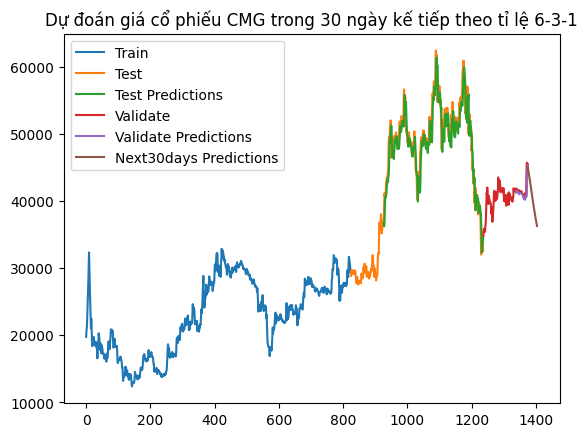

In [43]:
#Drawing plot
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(CMG1)-1, stop=len(CMG1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Test Predictions','Validate','Validate Predictions','Next30days Predictions'])
plt.title("Dự đoán giá cổ phiếu CMG trong 30 ngày kế tiếp theo tỉ lệ 6-3-1")
plt.show()

# 6. Chia tập dữ liệu để train-test-validate theo tỉ lệ 5:3:2

In [44]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(CMG1))
test_size = int(0.3 * len(CMG1))
val_size = len(CMG1) - train_size - test_size

In [45]:
train_data = CMG1[:train_size]
test_data = CMG1[train_size:train_size+test_size]
val_data = CMG1[train_size+test_size:]

<h1>Hàm Create Dataset

In [46]:
#Chuyển mảng giá trị của dataset thành ma trận
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [47]:
import numpy
#Reshape into X=t,t+1, t+2... t+99 and Y= t+100
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [48]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [49]:
#Define GRU model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [50]:
#Model fitting
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
10/10 [==============================] - 5s 205ms/step - loss: 0.0269 - val_loss: 0.0485
Epoch 2/100
10/10 [==============================] - 1s 73ms/step - loss: 0.0077 - val_loss: 0.0296
Epoch 3/100
10/10 [==============================] - 1s 72ms/step - loss: 0.0035 - val_loss: 0.0453
Epoch 4/100
10/10 [==============================] - 1s 72ms/step - loss: 0.0024 - val_loss: 0.0137
Epoch 5/100
10/10 [==============================] - 1s 72ms/step - loss: 0.0013 - val_loss: 0.0045
Epoch 6/100
10/10 [==============================] - 1s 70ms/step - loss: 5.8121e-04 - val_loss: 0.0024
Epoch 7/100
10/10 [==============================] - 1s 71ms/step - loss: 3.7689e-04 - val_loss: 0.0014
Epoch 8/100
10/10 [==============================] - 1s 71ms/step - loss: 3.5207e-04 - val_loss: 0.0013
Epoch 9/100
10/10 [==============================] - 1s 68ms/step - loss: 3.6244e-04 - val_loss: 0.0014
Epoch 10/100
10/10 [==============================] - 1s 70ms/step - loss: 3.3776e-

<h1>Dự báo dữ liệu test, val

In [51]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

6/6 [==============================] - 0s 13ms/step


<h1>Chuẩn hóa dữ liệu

In [52]:
#Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [53]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
ytest

array([[26977.],
       [25114.],
       [26329.],
       [25195.],
       [26532.],
       [26572.],
       [27382.],
       [27382.],
       [26288.],
       [26532.],
       [27342.],
       [27139.],
       [27301.],
       [27747.],
       [27747.],
       [27828.],
       [27787.],
       [27342.],
       [27787.],
       [27747.],
       [27747.],
       [27301.],
       [27625.],
       [27544.],
       [27544.],
       [29448.],
       [29691.],
       [29002.],
       [28638.],
       [30055.],
       [31676.],
       [31473.],
       [31068.],
       [30704.],
       [30299.],
       [29286.],
       [29326.],
       [28840.],
       [29691.],
       [29691.],
       [29164.],
       [29650.],
       [29650.],
       [29569.],
       [29569.],
       [29083.],
       [29488.],
       [29650.],
       [29650.],
       [29164.],
       [29488.],
       [29083.],
       [28597.],
       [28354.],
       [27747.],
       [28192.],
       [28678.],
       [28192.],
       [27544.

In [54]:
yval = scaler.inverse_transform(yval.reshape(-1,1))
yval

array([[47500.],
       [48400.],
       [46400.],
       [44600.],
       [45800.],
       [42600.],
       [43450.],
       [44500.],
       [42650.],
       [39700.],
       [41500.],
       [38600.],
       [40600.],
       [41900.],
       [40400.],
       [40000.],
       [40300.],
       [40900.],
       [40900.],
       [40300.],
       [38000.],
       [39000.],
       [39400.],
       [39750.],
       [39600.],
       [39250.],
       [38500.],
       [38450.],
       [36850.],
       [34300.],
       [32000.],
       [33200.],
       [35400.],
       [33950.],
       [35000.],
       [35000.],
       [32550.],
       [34800.],
       [35800.],
       [35750.],
       [35700.],
       [35950.],
       [35400.],
       [36200.],
       [36600.],
       [37800.],
       [39500.],
       [41200.],
       [41000.],
       [42000.],
       [41200.],
       [40000.],
       [39550.],
       [40800.],
       [40000.],
       [40400.],
       [40050.],
       [39700.],
       [39800.

<h1>Đánh giá độ chính xác của thuật toán

In [55]:
# RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 1020.2692544495574
Testing RMSE: 1217.347701559927


In [56]:
#MAE
valid_mae = mean_absolute_error(yval,y_pred_val)
test_mae = mean_absolute_error(ytest, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 706.2278125
Testing MAE: 859.7465207998392


In [57]:
#MAPE
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval))*100
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 1.769302415581607
Testing MAPE: 2.0535678398036574


<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [61]:
x_input=val_data[175:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.56905504 0.56206566 0.55707325 0.55807173 0.56206566 0.57205048
 0.58403227 0.6219746  0.61198978 0.61398674 0.58403227 0.60000799
 0.61198978 0.60200495 0.57804138 0.59102165 0.59102165 0.58203531
 0.59002316 0.59002316 0.58403227 0.57804138 0.57704289 0.59002316
 0.59002316 0.55208084 0.57005352 0.56306414 0.55008387 0.56406262
 0.57005352 0.56106718 0.53810208 0.56106718 0.55907021 0.56605959
 0.56206566 0.57205048 0.56805655 0.54009905 0.57804138 0.57205048
 0.57404745 0.55807173 0.571052   0.55607477 0.56206566 0.56306414
 0.56106718 0.5600687  0.55208084 0.55108235 0.55008387 0.56406262
 0.56306414 0.59002316 0.58103682 0.58403227 0.58403227 0.58702772
 0.58203531 0.58902468 0.58902468 0.58902468 0.5880262  0.5880262
 0.58503075 0.58503075 0.58203531 0.57804138 0.58003834 0.58203531
 0.58403227 0.58303379 0.58203531 0.58203531 0.58103682 0.58103682
 0.58103682 0.58003834 0.58003834 0.57704289 0.57205048 0.57205048
 0.57005352 0.56805655 0.56206566 0.56705807 0.5660

In [62]:
print(scaler.inverse_transform(lst_output))

[[45171.95576906]
 [45113.47233868]
 [45009.61753821]
 [44882.46666884]
 [44737.57735777]
 [44578.41192913]
 [44407.51936984]
 [44226.98602867]
 [44038.54605246]
 [43843.71868515]
 [43643.84706974]
 [43440.10720253]
 [43233.534796  ]
 [43025.073035  ]
 [42815.52780533]
 [42605.64529753]
 [42396.06723547]
 [42187.35475445]
 [41980.01227927]
 [41774.46663094]
 [41571.08195043]
 [41370.18954635]
 [41172.04610825]
 [40976.86056948]
 [40784.84186339]
 [40596.11236525]
 [40410.80638933]
 [40229.00452423]
 [40050.74855661]
 [39876.10116649]]


<h1>Vẽ hình mô tả dự đoán

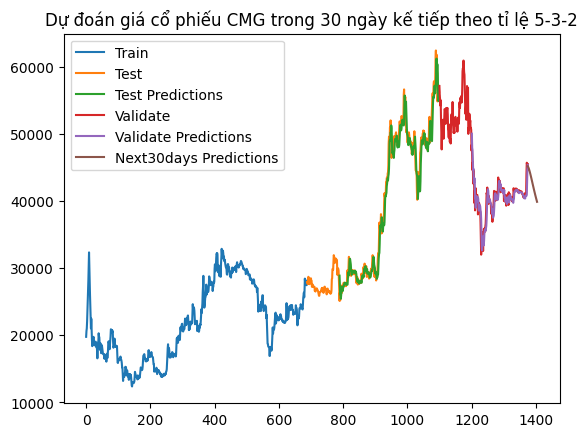

In [63]:
#Drawing plot
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(CMG1)-1, stop=len(CMG1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Test Predictions','Validate','Validate Predictions','Next30days Predictions'])
plt.title("Dự đoán giá cổ phiếu CMG trong 30 ngày kế tiếp theo tỉ lệ 5-3-2")
plt.show()